# Kinematics

### Point

A rigid body is completely described by position and orientation.
The position of a point can be written as a 3x1 vector

In [1]:
from EngineeringToolbox import *

In [2]:
import numpy as np

class Point:
    
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.val = dict(x=x, y=y, z=z)
        self.vector = self.vector()
        
    def vector(self):
        return np.array([self.x, self.y, self.z])
    
__x__ = Point(1,0,0)
__y__ = Point(0,1,0)
__y__ = Point(0,0,1)
__O__ = Point(0,0,0)
        
        
#     def set_position(self, x,y,z):
#         self.position = dict(x=x, y=y, z=z)

In [3]:
a = Point(1,2,3)
a.val['x']

1

### Frame

O_, x_, y_, z_ is a frame with origin in O_ and x_, y_, z_ unit vectors.
All the inputs are related to the global origin

In [4]:
class Axis:
    def __init__(self, x, y, z, origin = None):
        if origin:
            self.origin = origin
        else:
            self.origin = __O__
        self.end = Point(x,y,z)
        self.vector = self.vector()
        self = self.__dict__
            
    def vector(self):
        return self.end.vector - self.origin.vector
    
__X__ = Axis(1,0,0)
__Y__ = Axis(0,1,0)
__Z__ = Axis(0,0,1)

class Frame:
    def __init__(self, items):
        self.size = len(items)
        self.axes_dict = {str(i) : items[i] for i in range(len(items))}
        self.axes = items
#         vectors in line
        self.vector = np.array([item.vector for _, item in self.axes_dict.items()])
        
__F__ = Frame([__X__, __Y__, __Z__])
__F__.axes
        
        
#     def init_vector(self):
#         return self.x*X + self.y*Y + self.z*Z
    
#     def apply_rotation(self, rot):
#         self.vector = self.vector.dot(rot.rot_X).dot(rot.rot_Y).dot(rot.rot_Z)
#         self.x = self.vector[0]
#         self.y = self.vector[1]
#         self.z = self.vector[2]

# class Frame:
#     def init_origin(self,x_,y_,z_):
#         self.origin = Point()
#         self.origin.set_position(x_,y_,z_)
#     def init_axis(self, X_, Y_, Z_):
#         self.axis = dict(x=Axis(X_[0], X_[1], X_[2]), y=Axis(Y_[0], Y_[1], Y_[2]), z=Axis(Z_[0], Z_[1], Z_[2]))
#     def apply_rotation(self, rot):
#         self.axis['x'].apply_rotation(rot)
#         self.axis['y'].apply_rotation(rot)
#         self.axis['z'].apply_rotation(rot)

In [5]:
def variablename(var):
    return [tpl[0] for tpl in filter(lambda x: var is x[1], globals().items())]

variablename(__F__)

['__F__']

In [6]:
X = Axis(1,0,0)
X.end.vector

array([1, 0, 0])

### MATH

In [7]:
def prod(elements):
    return np.linalg.multi_dot(elements)

# Plot

In [8]:
def variablename(var):
            return [tpl[0] for tpl in filter(lambda x: var is x[1], globals().items())]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

def add_vector(ax, vectors, **kwargs):
    colors = kwargs.get('colors', None)
    if type(colors) is str:
        colors = [colors for x in range(len(vectors))]
    elif colors == None:
        colors = [None for x in range(len(vectors))]
    i = 0
    j = 0
    for vector in vectors:
        vectorname = variablename(vector)[0].replace('__', '')
        if vector.__class__.__name__ == 'Frame':
            j += 3
            for axis in vector.axes:
                vectorname = variablename(axis)[0].replace('__', '')
                points = [[axis.origin.vector[i], axis.end.vector[i]] for i in range(len(axis.vector))]
                ax.plot(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i],
                       label = vectorname)
                a = Arrow3D(points[0],
                   points[1],
                   points[2],mutation_scale = 10, arrowstyle="-|>", color=colors[i])
                ax.add_artist(a)
        if vector.__class__.__name__ == 'Axis':
            j += 1
            points = [[vector.origin.vector[i], vector.end.vector[i]] for i in range(len(vector.vector))]
            ax.plot(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i],
                   label = vectorname)
            a = Arrow3D(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i])
            ax.add_artist(a)
        if vector.__class__.__name__ == 'Point':
            j += 1
            points = vector.vector
            print(points)
            ax.scatter(points[0],
                      points[1],
                      points[2],
                      color = colors[i],
                      label = vectorname)
        legend = kwargs.get('legend', False)
        if legend:
            ax.legend(ncol=j)
        i+=1

def show(vectors, **kwargs):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    add_vector(ax, vectors, **kwargs)
    

In [9]:
F = __F__

In [10]:
Plotter.getvariablename2(__F__)

'__F__'

In [11]:
import traceback 
def getvariablename(var):
    stack = traceback.extract_stack()
    _, _, _, get = stack[-2]
    print(get[16:-1])
    
getvariablename(__F__)

__F__


In [12]:
import inspect, itertools
def aaa (a):
    frame = inspect.currentframe()
    frame = inspect.getouterframes(frame)[1]
    string = inspect.getframeinfo(frame[0]).code_context[0].strip()
    args = string[string.find('(') + 1:-1].split(',')

    names = []
    for i in args:
        if i.find('=') != -1:
            names.append(i.split('=')[1].strip())

        else:
            names.append(i)

    return names

aaa(__F__)

['__F__']

[0.5 0.5 0.5]


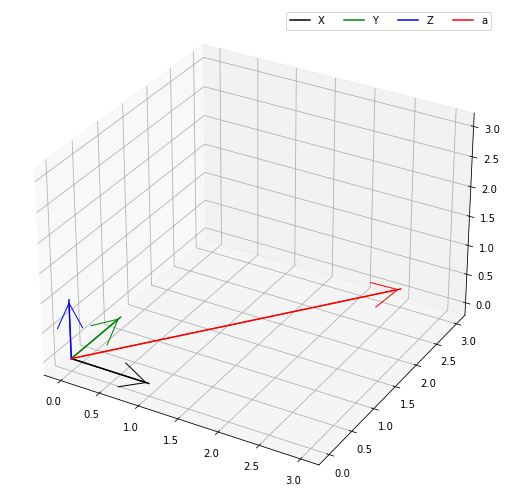

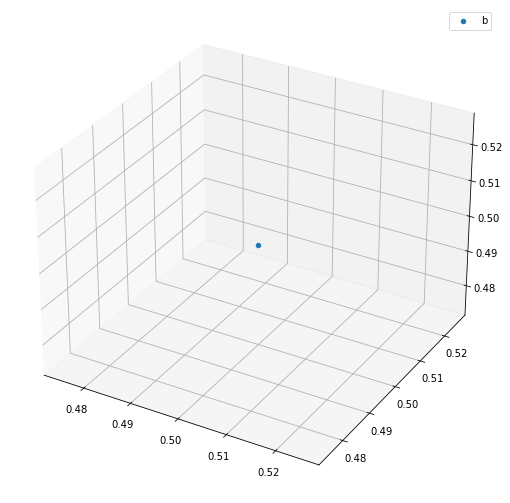

In [16]:
a = Axis(3,2,1)
inputs = [__F__, a]
Plotter.show(inputs, colors = [['black', 'green', 'blue'], 'red'], arrow=False, arrowstyle = "->", mutation_scale = 63, legend = True, labels = [['X', 'Y', 'Z'], 'a'])
b = Point(0.5, 0.5, 0.5)
show([b], colors=None, legend=True)
# Plotter.show([__X__, __Y__, __Z__], colors='black')

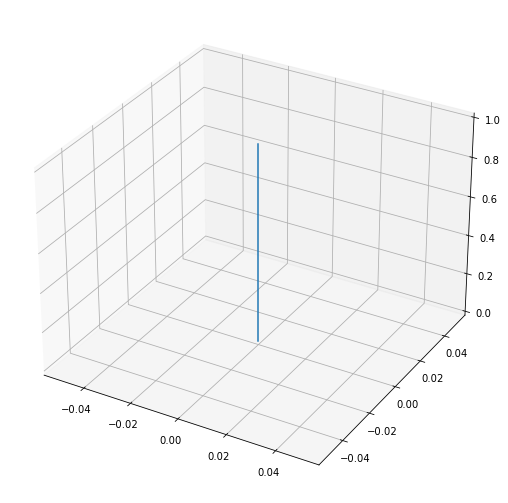

In [77]:
def ax_(points):
    ax.plot(points[0],
                   points[1])

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,0],
       [0,0],
       [0,1])

plt.show()

### Rotation matrix

3x3 matrix whose column vectors are orthonormal frame.
It is orthogonal matrix (xTy = 0, xTx = 1, RTR = I, RT = R-1)

##### elementary rotations

Rotation around one of the coordinate axes. Positive if counterclockwise

In [4]:
rot = RotationMatrix(0.2,0.5,1)
print('Rotation around X of {}' .format(0.2), '\n', rot.rot_X, '\n')
print('Rotation around Y of {}' .format(0.5), '\n', rot.rot_Y, '\n')
print('Rotation around Z of {}' .format(0.1), '\n', rot.rot_Z)

Rotation around X of 0.2 
 [[ 1.          0.          0.        ]
 [ 0.          0.98006658 -0.19866933]
 [ 0.          0.19866933  0.98006658]] 

Rotation around Y of 0.5 
 [[ 0.87758256  0.          0.47942554]
 [ 0.          1.          0.        ]
 [-0.47942554  0.          0.87758256]] 

Rotation around Z of 0.1 
 [[ 0.54030231  0.84147098  0.        ]
 [-0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]


### Exercise 1

In [5]:
F = Frame()
F.init_origin(4,5.1,0.2)

F.init_axis((0,1,0),
            (1,0,0),
           (0,0,1))

rot = RotationMatrix(1.2,np.pi,-0.4)

from copy import deepcopy

F_rot = deepcopy(F)
F_rot.apply_rotation(rot)

sum(F_rot.axis['x'].vector.round(5) == [0.14111, 0.33375, 0.93204])
sum(F_rot.axis['y'].vector.round(5) == [-0.92106,  0.38942,  0.     ])
sum(F_rot.axis['z'].vector.round(5) == [ 0.36295,  0.85846, -0.36236])

3

In [6]:
import matplotlib.pyplot as plt

In [7]:
F_rot.axis['x'].vector.round(2)

array([0.14, 0.33, 0.93])

{'x': 0, 'y': 0, 'z': 0}
[0 1 0]


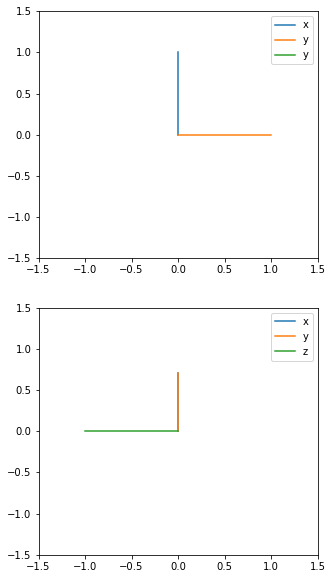

In [17]:
F = Frame()
F.init_origin(0,0,0)
print(F.origin.position)

F.init_axis((0,1,0),
            (1,0,0),
           (0,0,1))
print(F.axis['x'].vector)

Ox = F.origin.position['x']
Oy = F.origin.position['y']

rot = RotationMatrix(0, 0, np.pi/4)
rot1 = RotationMatrix(0, np.pi/2, 0)

from copy import deepcopy

F_rot = deepcopy(F)

F_rot.apply_rotation(rot)
F_rot.apply_rotation(rot1)

fig, (ax0, ax1) = plt.subplots(2,figsize=(5,10))
ax0.plot([Ox,F.axis['x'].x],[Oy,F.axis['x'].y], label='x')
ax0.plot([Ox,F.axis['y'].x],[Oy,F.axis['y'].y], label='y')
ax0.plot([Ox,F.axis['z'].x],[Oy,F.axis['z'].y], label='y')
ax0.legend()
ax1.plot([Ox,F_rot.axis['x'].x],[Oy,F_rot.axis['x'].y], label='x')
ax1.plot([Ox,F_rot.axis['y'].x],[Oy,F_rot.axis['y'].y], label='y')
ax1.plot([Ox,F_rot.axis['z'].x],[Oy,F_rot.axis['z'].y], label='z')
ax1.legend()
ax0.set_xlim(-1.5,1.5)
ax0.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
plt.show()

{'x': 0, 'y': 0, 'z': 0}
[1 1 0]


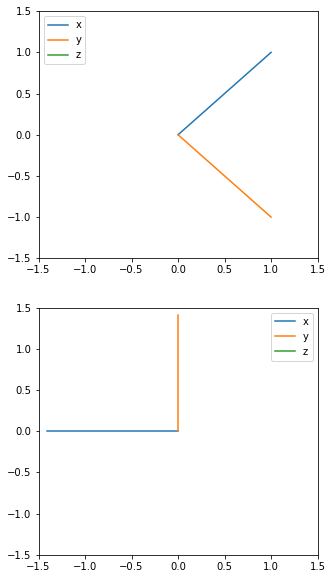

In [18]:
F = Frame()
F.init_origin(0,0,0)
print(F.origin.position)

F.init_axis((1,1,0),
            (1,-1,0),
           (0,0,1))
print(F.axis['x'].vector)

Ox = F.origin.position['x']
Oy = F.origin.position['y']

rot0 = RotationMatrix(0,0,3/4*np.pi)
rot1 = RotationMatrix(0,0,0)

from copy import deepcopy

F_rot = deepcopy(F)

F_rot.apply_rotation(rot0)
F_rot.apply_rotation(rot1)

fig, (ax0, ax1) = plt.subplots(2,figsize=(5,10))
ax0.plot([Ox,F.axis['x'].x],[Oy,F.axis['x'].y], label='x')
ax0.plot([Ox,F.axis['y'].x],[Oy,F.axis['y'].y], label='y')
ax0.plot([Ox,F.axis['z'].x],[Oy,F.axis['z'].y], label='z')
ax0.legend()
ax1.plot([Ox,F_rot.axis['x'].x],[Oy,F_rot.axis['x'].y], label='x')
ax1.plot([Ox,F_rot.axis['y'].x],[Oy,F_rot.axis['y'].y], label='y')
ax1.plot([Ox,F_rot.axis['z'].x],[Oy,F_rot.axis['z'].y], label='z')
ax1.legend()
ax0.set_xlim(-1.5,1.5)
ax0.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
plt.show()

{'x': 0, 'y': 0, 'z': 0}
[1 0 0]


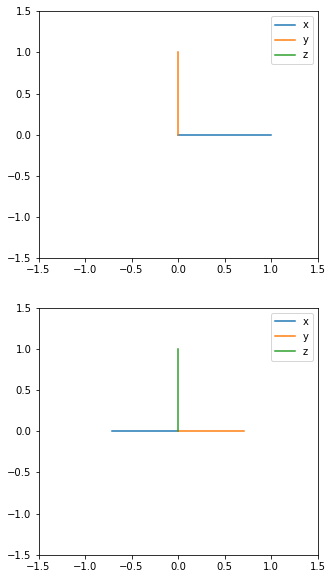

In [16]:
F = Frame()
F.init_origin(0,0,0)
print(F.origin.position)

F.init_axis((1,0,0),
            (0,1,0),
           (0,0,1))
print(F.axis['x'].vector)

Ox = F.origin.position['x']
Oy = F.origin.position['y']

rot0 = RotationMatrix(0,0,-3/4*np.pi)
rot1 = RotationMatrix(1/2*np.pi,0,0)

from copy import deepcopy

F_rot = deepcopy(F)

F_rot.apply_rotation(rot0)
F_rot.apply_rotation(rot1)

fig, (ax0, ax1) = plt.subplots(2,figsize=(5,10))
ax0.plot([Ox,F.axis['x'].x],[Oy,F.axis['x'].y], label='x')
ax0.plot([Ox,F.axis['y'].x],[Oy,F.axis['y'].y], label='y')
ax0.plot([Ox,F.axis['z'].x],[Oy,F.axis['z'].y], label='z')
ax0.legend()
ax1.plot([Ox,F_rot.axis['x'].x],[Oy,F_rot.axis['x'].y], label='x')
ax1.plot([Ox,F_rot.axis['y'].x],[Oy,F_rot.axis['y'].y], label='y')
ax1.plot([Ox,F_rot.axis['z'].x],[Oy,F_rot.axis['z'].y], label='z')
ax1.legend()
ax0.set_xlim(-1.5,1.5)
ax0.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
plt.show()

{'x': 0, 'y': 0, 'z': 0}
[1 0 0]


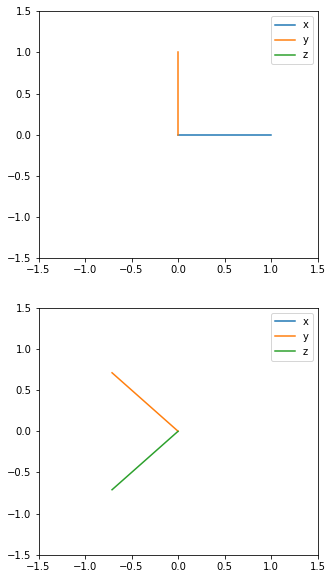

In [20]:
F = Frame()
F.init_origin(0,0,0)
print(F.origin.position)

F.init_axis((1,0,0),
            (0,1,0),
           (0,0,1))
print(F.axis['x'].vector)

Ox = F.origin.position['x']
Oy = F.origin.position['y']

rot = RotationMatrix(0, 0, np.pi/4)
rot1 = RotationMatrix(0, np.pi/2, 0)

tot_rot = np.linalg.multi_dot([rot1.rot_Y, rot0.rot_Z]).round(2)

from copy import deepcopy

F_rot = deepcopy(F)

F_rot.apply_rotation(tot_rot)

fig, (ax0, ax1) = plt.subplots(2,figsize=(5,10))
ax0.plot([Ox,F.axis['x'].x],[Oy,F.axis['x'].y], label='x')
ax0.plot([Ox,F.axis['y'].x],[Oy,F.axis['y'].y], label='y')
ax0.plot([Ox,F.axis['z'].x],[Oy,F.axis['z'].y], label='z')
ax0.legend()
ax1.plot([Ox,F_rot.axis['x'].x],[Oy,F_rot.axis['x'].y], label='x')
ax1.plot([Ox,F_rot.axis['y'].x],[Oy,F_rot.axis['y'].y], label='y')
ax1.plot([Ox,F_rot.axis['z'].x],[Oy,F_rot.axis['z'].y], label='z')
ax1.legend()
ax0.set_xlim(-1.5,1.5)
ax0.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
plt.show()